In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Drive Marina
# drive.mount('/content/drive/My Drive/TFG')
# Drive Esti:
import os
os.chdir('/content/drive/My Drive/Estibaliz Gomez de Mariscal/TFG MARINA CALZADA')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import glob
import cv2
import scipy
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns
from scipy.signal import savgol_filter


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


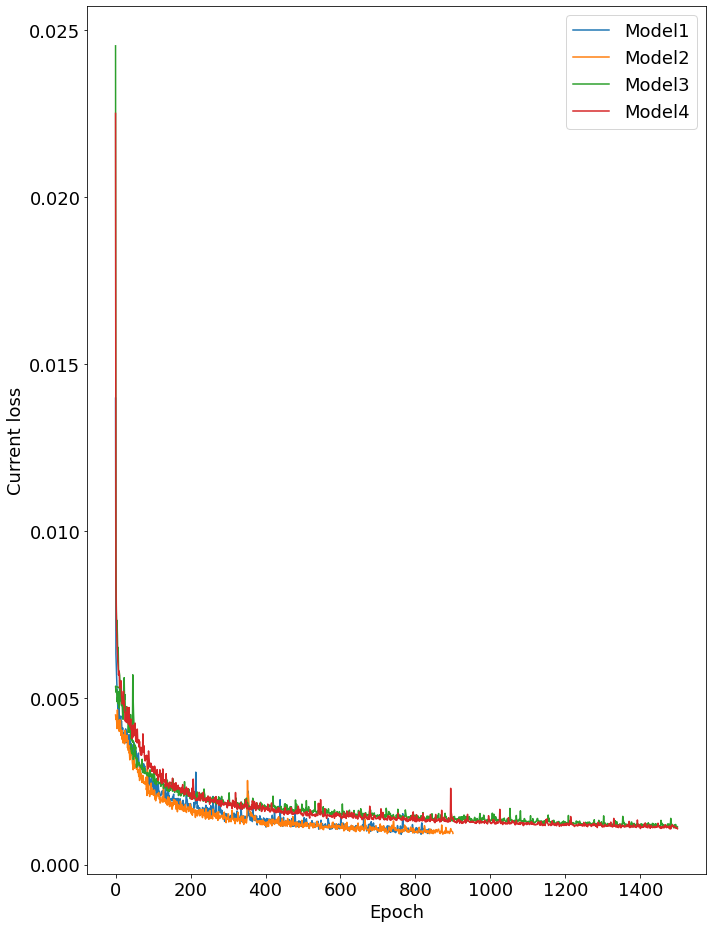

In [ ]:
# Models 1, 2, 3, 4
path2results='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/RESULTS-SERVER/results/'

fig, ax = plt.subplots(figsize=(10,13))
os.chdir(path2results)
names=['Model1', 'Model2','Model3','Model4']
for i in range(len(names)):
    vid= pd.read_csv(path2results + names[i] +'.csv', sep=';',header=0)

    y=vid[' Average loss']
    x=vid['Epoch']
    
    ax.plot(x,y,label=names[i])
    # ax.set_yscale('log')      

ax.set_xlabel('Epoch',fontsize=18)
ax.set_ylabel('Current loss', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.legend(prop={'size': 18})
fig.tight_layout()
fig.savefig(path2results + 'Average_loss_a.pdf', dpi=300, transparent= True)

In [ ]:
model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
model

<function __main__.<lambda>>

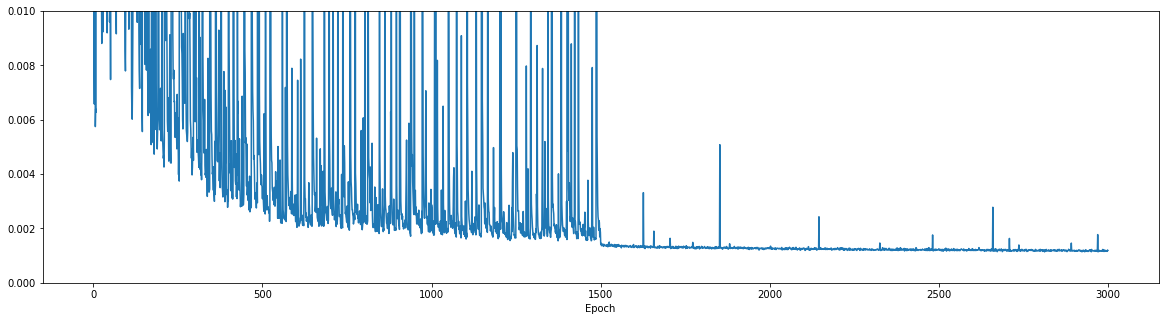

In [ ]:
from scipy.interpolate import interp1d, BSpline
# 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(0, T.max(), 300) 
X = np.array(_loss_info['Epoch'])
Y = np.array(_loss_info['Average loss'])
Y[Y>0.5] = 0.5
spl = interp1d(X,Y, kind='cubic')  # type: BSpline
power_smooth = spl(X)
power_smooth[power_smooth>0.5]=0.5
plt.figure(figsize=(20,5))
sns.lineplot(_loss_info['Epoch'], power_smooth)
plt.ylim((0,0.01))
plt.show()

,Epoch,Average,Cell,Background,Validation precision,Validation recall,F1 score,IoU score,Average loss,LR
0,0,0.9977989665878495,0.277437,0.999007,0.9980538795543719,0.9977989665878495,0.9979137856175044,0.5872186086865716,0.363625,0.010
1,1,0.9977989665878495,0.277437,0.999007,0.9980538795543719,0.9977989665878495,0.9979137856175044,0.5872186086865716,0.027802,0.010
2,2,0.9977989665878495,0.277437,0.999007,0.9980538795543719,0.9977989665878495,0.9979137856175044,0.5872186086865716,0.008933,0.010
3,3,0.9977989665878495,0.277437,0.999007,0.9980538795543719,0.9977989665878495,0.9979137856175044,0.5872186086865716,0.006577,0.010
4,4,0.9977989665878495,0.277437,0.999007,0.9980538795543719,0.9977989665878495,0.9979137856175044,0.5872186086865716,0.024804,0.010
...,...,...,...,...,...,...,...,...,...,...
3015,2995,0.9989383926859665,0.792015,0.999353,0.9989507815065515,0.9989383926859665,0.9988848626055199,0.7826407433351767,0.001158,0.001
3016,2996,0.9989383926859665,0.792015,0.999353,0.9989507815065515,0.9989383926859665,0.9988848626055199,0.7826407433351767,0.001167,0.001
3017,2997,0.9989383926859665,0.792015,0.999353,0.9989507815065515,0.9989383926859665,0.9988848626055199,0.7826407433351767,0.001156,0.001
3018,2998,0.9989383926859665,0.792015,0.999353,0.9989507815065515,0.9989383926859665,0.9988848626055199,0.7826407433351767,0.001206,0.001


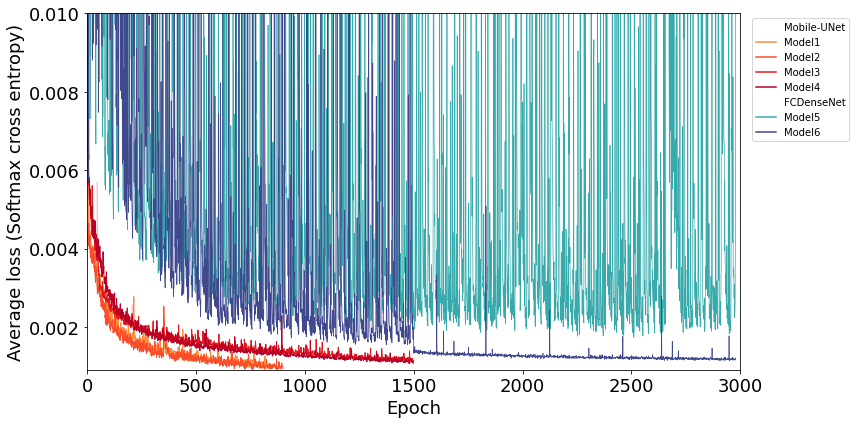

In [11]:
#Load the loss information about Models 1, 2, 3, 4, 5 and 6
from scipy.interpolate import interp1d
# path2results='/content/'
path2results='Seg_github/RESULTS-SERVER/results/'
loss_info1234 = pd.DataFrame()
loss_info56 = pd.DataFrame()
names=['Model1', 'Model2','Model3','Model4', 'Model5', 'Model6']
for i in range(len(names)):
    vid= pd.read_csv(path2results + names[i] +'.csv', sep=';',header=0)
    if names[i] == 'Model5' or names[i] == 'Model6':
      vid = pd.concat([vid[:1500], vid[1520:]])
    
    X = np.array(vid['Epoch'])
    X = np.linspace(0, len(X), len(X)) 
    Y = np.array(vid[' Average loss'])
    # Y[Y>0.5] = 0.5
    spl = interp1d(X,Y, kind='cubic')  # type: BSpline
    power_smooth = spl(X)
    # power_smooth[power_smooth>0.5]=0.5

    _loss_info = pd.DataFrame()
    # _loss_info['Average loss'] = vid[' Average loss']
    _loss_info['Average loss'] = power_smooth
    _loss_info['Epoch'] = vid['Epoch']
    _loss_info['Model'] = names[i]
    
    if names[i] == 'Model5' or names[i] == 'Model6':
      loss_info56 = pd.concat([loss_info56, _loss_info])
    else:
      loss_info1234 = pd.concat([loss_info1234, _loss_info])

loss_info1234 = loss_info1234.rename(columns={'Model':'Mobile-UNet'})
loss_info56 = loss_info56.rename(columns={'Model':'FCDenseNet'})

import seaborn as sns
from matplotlib.colors import LogNorm


fig = plt.figure(figsize=(12,6))
palette = sns.color_palette("YlOrRd", 7)
palette = palette[-4:]
g1 = sns.lineplot(x="Epoch", y="Average loss",
             hue="Mobile-UNet", alpha=1, lw=1, palette = palette, data=loss_info1234)
g1.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

palette = sns.color_palette("mako_r", 2)
g1=sns.lineplot(x="Epoch", y="Average loss",
             hue="FCDenseNet", alpha=1,lw=0.7, palette=palette, data=loss_info56)
g1.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1)
# plt.legend(names, bbox_to_anchor=(1.01, 1))
plt.ylim(np.min(loss_info1234['Average loss']),0.01)
plt.xlim(0,3000)
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Average loss (Softmax cross entropy)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout() 
plt.show()
fig.savefig(path2results + 'Average_loss.pdf', dpi=300, transparent= True)


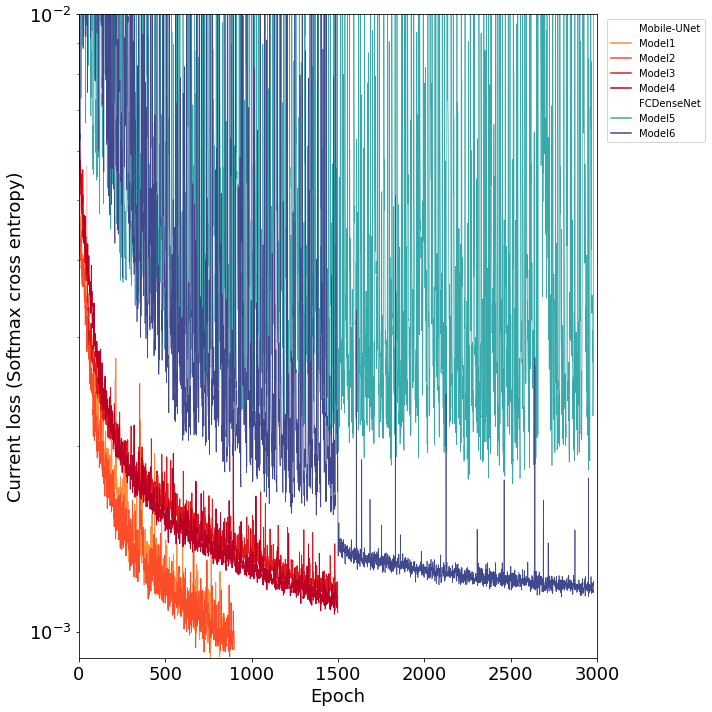

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
palette = sns.color_palette("YlOrRd", 7)
palette = palette[-4:]
g1 = sns.lineplot(x="Epoch", y="Average loss",
             hue="Mobile-UNet", alpha=1, lw=1, palette = palette, data=loss_info1234)
g1.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1)
palette = sns.color_palette("mako_r", 2)
g1=sns.lineplot(x="Epoch", y="Average loss",
             hue="FCDenseNet", alpha=1,lw=0.7, palette=palette, data=loss_info56)
g1.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1)
ax.set_yscale('log')
# plt.legend(names, bbox_to_anchor=(1.01, 1))
plt.ylim(np.min(loss_info['Average loss']),0.01)
plt.xlim(0,3000)
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Current loss (Softmax cross entropy)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout() 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


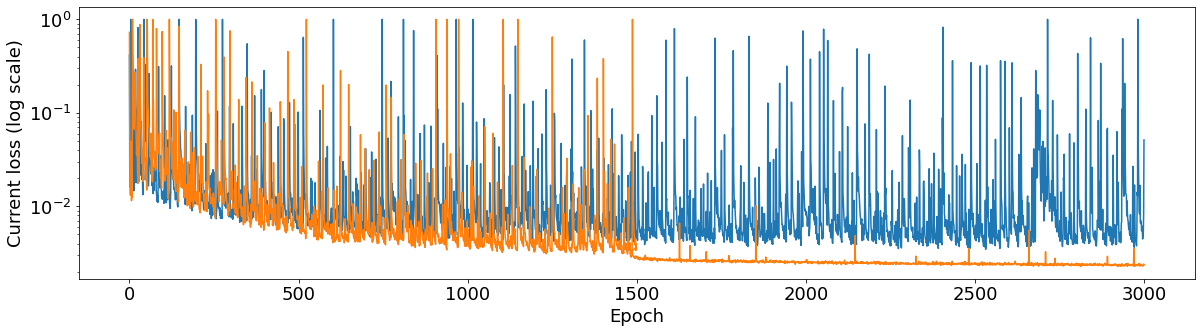

In [ ]:
# Models 5 y 6
# path2results='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/RESULTS-SERVER/results/'

fig, ax = plt.subplots(figsize=(20,5))
# os.chdir(path2results)
names=['Model5','Model6']
for i in range(len(names)):
    vid= pd.read_csv(path2results + names[i] +'.csv', sep=';',header=0)

    y=vid[' Average loss']
    x=vid['Epoch']
    # Esto es para que no fueran muy altos los picos, que he quitado los valores
    # más altos ya que había algunos de 6 y eran muy grandes respecto a otros y normalizando aun así el rango era demasiado
    y[y>0.5]=0.5
    y=y/y.max()

    # Seaborn:
    # sns.lineplot(x,y)

    # Plot:
    ax.plot(x,y,label=names[i])

    ax.set_yscale('log')      

ax.set_xlabel('Epoch',fontsize=18)
ax.set_ylabel('Current loss (log scale)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)


# ax.legend(prop={'size': 18})
# fig.tight_layout()
# fig.savefig(path2results + 'Average_loss_b.pdf', dpi=300, transparent= True)

Con esto se plotea cualquier valor de los vidos que se quiera.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


10000_11-20-13_1003_xy008_078-080
Videos and corresponding protrusion analysis_IL-6_6-1-14_1001_xy28_330-332


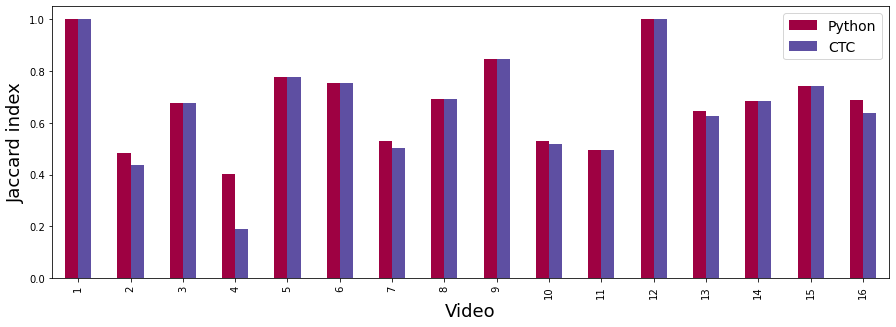

In [ ]:
# Compare the constant with both methods
# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'
path2data= '/content/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'


vid_cpn = pd.read_csv(path2data+'video_accuracies_1500.csv',sep=';',header=0)
vid_cell = pd.read_csv(path2cell + 'results.csv', sep=';', header=0)
fig, ax = plt.subplots(figsize=(15,5))
vid_order = pd.read_csv(path2cell + 'videos_name.csv', sep=';', header=0)

vid_cell.rename(columns={'Video':'video'}, inplace=True)


df1 = pd.DataFrame(vid_cpn[['video', ' Jaccard index']])
df1['Reduce']='0'
for i in range(len(df1['video'])):
    for j in range(len(vid_cell['video'])):
        if df1['video'][i]==vid_cell['video'][j]:
            df1['Reduce'][i]=vid_cell['Reduce'][j]
df2 = pd.DataFrame(vid_order[['Video', 'Name']])
df2['Reduce']='0'
df2[' Jaccard index']='0'
for i in range(len(df2['Video'])):
    for j in range(len(df2['Video'])):
        if df2['Video'][i]==df1['video'][j]:
            if df1['Reduce'][j]==0:
                df2['Reduce'][i]=1
                print(df1['video'][j])
            else:
                 df2['Reduce'][i]=df1['Reduce'][j]
            if df1[' Jaccard index'][j]==0:
              df2[' Jaccard index'][i]=1
            else:
              df2[' Jaccard index'][i]=df1[' Jaccard index'][j]


df2['Num']='0'
labels=np.zeros(16)
for i in range(len(df2['Name'])):
  df2['Num'][i]=i+1
  labels[i]=i+1

df2.plot.bar(x = 'Num', y = [' Jaccard index', 'Reduce'], ax = ax, cmap='Spectral')

ax.set_xlabel('Video', fontsize=18)
ax.set_ylabel('Jaccard index', fontsize=18)
ax.legend(labels=('Python','CTC'),prop={'size': 14})

fig.savefig(path2data + 'Jaccard_index_mod4.pdf', dpi=300, transparent= True)

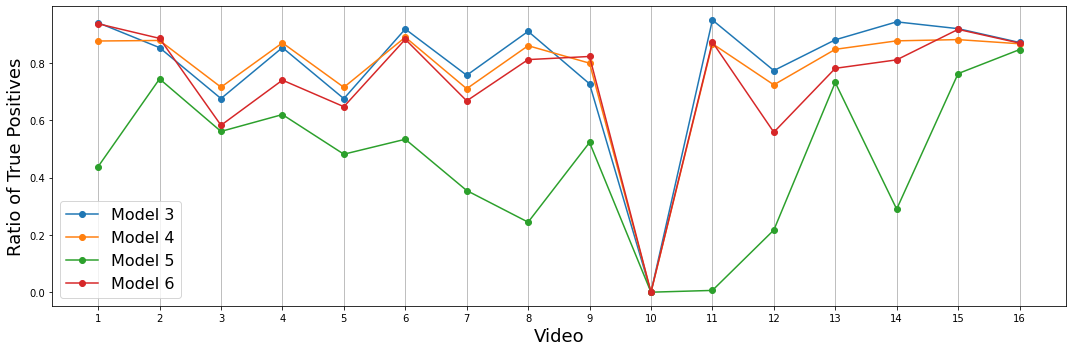

In [ ]:
# path2val = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/validation/'
path2val = '/content/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'
path2cell= path2val
mod3 = pd.read_csv(path2val + 'video_accuracies_val_Model3.csv',sep=';',header=0)
mod4 = pd.read_csv(path2val+'video_accuracies_val_Model4.csv',sep=';',header=0)
mod5 = pd.read_csv(path2val+'video_accuracies_val_Model5.csv',sep=';',header=0)
mod6 = pd.read_csv(path2val+'video_accuracies_val_Model6.csv',sep=';',header=0)
fig, ax = plt.subplots(figsize=(15,5))
vid_order = pd.read_csv(path2cell + 'videos_name.csv', sep=';', header=0)

vid_order.rename(columns={'Video':'video'}, inplace=True)

dfval= pd.DataFrame(vid_order[['video', 'Name']])
num=0
dfval['Model3']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod3['video'])):
        if dfval['video'][i]==mod3['video'][j]:
            dfval['Model3'][i]=mod3[' Cell_validation'][j]

dfval['Model4']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod4['video'])):
        if dfval['video'][i]==mod4['video'][j]:
            dfval['Model4'][i]=mod4[' Cell_validation'][j]
            num+=mod4[' Cell_validation'][j]

dfval['Model5']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod5['video'])):
        if dfval['video'][i]==mod5['video'][j]:
            dfval['Model5'][i]=mod5[' Cell_validation'][j]

dfval['Model6']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod6['video'])):
        if dfval['video'][i]==mod6['video'][j]:
            dfval['Model6'][i]=mod6[' Cell_validation'][j]


dfval['Num']='0'
labels=np.zeros(16)
for i in range(len(dfval['Name'])):
  dfval['Num'][i]=i+1
  labels[i]=i+1

ax.plot(dfval['Num'], dfval['Model3'],'o-', label='Model 3')
ax.plot(dfval['Num'], dfval['Model4'],'o-', label='Model 4')
ax.plot(dfval['Num'], dfval['Model5'],'o-', label='Model 5')
ax.plot(dfval['Num'], dfval['Model6'],'o-', label='Model 6')

ax.set_xlabel('Video',fontsize=18)
ax.set_ylabel('Ratio of True Positives', fontsize=18)
ax.grid(axis='x')
ax.set_xticks(labels)

ax.legend(prop={'size': 16})
plt.tight_layout() 
plt.show()

fig.savefig(path2val+'True_positives.pdf', dpi=300, transparent= True)

5000_7-1-14_001_xy001_240-242


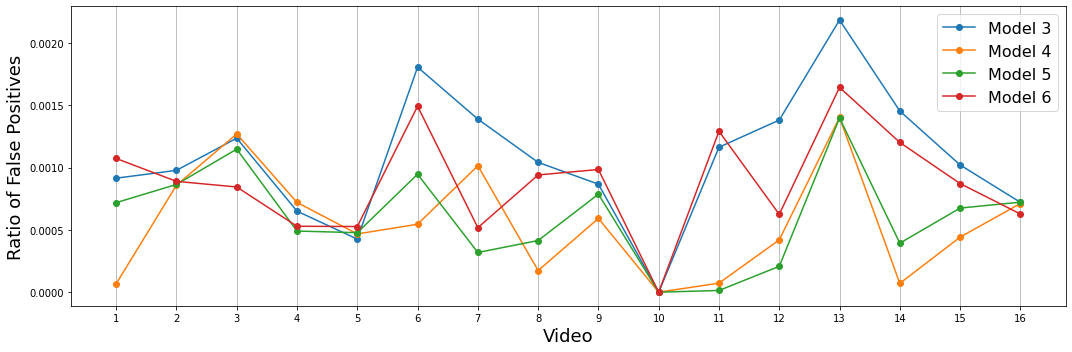

In [ ]:
# path2val = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/validation/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'

mod3 = pd.read_csv(path2val+'video_accuracies_val_Model3.csv',sep=';',header=0)
mod4 = pd.read_csv(path2val+'video_accuracies_val_Model4.csv',sep=';',header=0)
mod5 = pd.read_csv(path2val+'video_accuracies_val_Model5.csv',sep=';',header=0)
mod6 = pd.read_csv(path2val+'video_accuracies_val_Model6.csv',sep=';',header=0)
fig, ax = plt.subplots(figsize=(15,5))
vid_order = pd.read_csv(path2cell + 'videos_name.csv', sep=';', header=0)

vid_order.rename(columns={'Video':'video'}, inplace=True)
num=0
dfval= pd.DataFrame(vid_order[['video', 'Name']])
print(dfval['video'][10])
dfval['Model3']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod3['video'])):
        if dfval['video'][i]==mod3['video'][j]:
            dfval['Model3'][i]=mod3[' FP'][j]

dfval['Model4']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod4['video'])):
        if dfval['video'][i]==mod4['video'][j]:
            dfval['Model4'][i]=mod4[' FP'][j]
            num+=mod4[' FP'][j]

dfval['Model5']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod5['video'])):
        if dfval['video'][i]==mod5['video'][j]:
            dfval['Model5'][i]=mod5[' FP'][j]

dfval['Model6']='0'
for i in range(len(dfval['video'])):
    for j in range(len(mod6['video'])):
        if dfval['video'][i]==mod6['video'][j]:
            dfval['Model6'][i]=mod6[' FP'][j]

dfval['Num']='0'
labels=np.zeros(16)
for i in range(len(dfval['Name'])):
  dfval['Num'][i]=i+1
  labels[i]=i+1

ax.plot(dfval['Num'], dfval['Model3'],'o-', label='Model 3')
ax.plot(dfval['Num'], dfval['Model4'],'o-', label='Model 4')
ax.plot(dfval['Num'], dfval['Model5'],'o-', label='Model 5')
ax.plot(dfval['Num'], dfval['Model6'],'o-', label='Model 6')

ax.set_xlabel('Video',fontsize=18)
ax.set_ylabel('Ratio of False Positives', fontsize=18)
ax.grid(axis='x')
ax.set_xticks(labels)

ax.legend(prop={'size': 16})
plt.tight_layout() 
plt.show()

fig.savefig(path2val + 'False_positives.pdf', dpi=300, transparent= True)

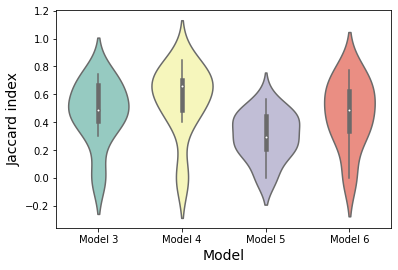

In [ ]:
# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'
# vid_red = pd.read_csv(path2data+'sampling_reduce_v00/video_accuracies_1500.csv',sep=';',header=0)
# vid_cpn = pd.read_csv(path2data+'sampling_constant_v00/video_accuracies_1500.csv',sep=';',header=0)
# vid5 = pd.read_csv(path2data + 'constante_tiramisu/2980/video_accuracies_2980.csv',sep=';',header=0)
# vid6 = pd.read_csv(path2data + 'reduce_tiramisu/3000/video_accuracies_3000.csv',sep=';',header=0)

vid_red = pd.read_csv('Model 4.csv',sep=';',header=0)
vid_cpn = pd.read_csv('Model3.csv',sep=';',header=0)
vid5 = pd.read_csv('Model 5.csv',sep=';',header=0)
vid6 = pd.read_csv('Model 6.csv',sep=';',header=0)

fig, ax = plt.subplots()


sns.violinplot(ax=ax, data=[vid_cpn [' Jaccard index'], vid_red [' Jaccard index'],vid5 [' Jaccard index'],vid6 [' Jaccard index']],palette="Set3")
xticklabels=['Model 3', 'Model 4', 'Model 5', 'Model 6']
ax.set_xticklabels(xticklabels, fontsize=10)
ax.set_ylabel('Jaccard index',fontsize=14)
ax.set_xlabel('Model', fontsize=14)

# fig.savefig(path2data + 'Jac_violin.pdf', dpi=300, transparent= True)
fig.savefig('Jac_violin.pdf', dpi=300, transparent= True)

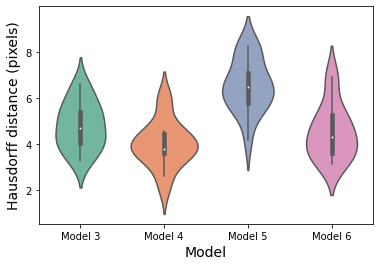

In [ ]:
# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'

# vid_red = pd.read_csv(path2data+'sampling_reduce_v00/video_accuracies_1500.csv',sep=';',header=0)
# vid_cpn = pd.read_csv(path2data+'sampling_constant_v00/video_accuracies_1500.csv',sep=';',header=0)
# vid5 = pd.read_csv(path2data + 'constante_tiramisu/2980/video_accuracies_2980.csv',sep=';',header=0)
# vid6 = pd.read_csv(path2data + 'reduce_tiramisu/3000/video_accuracies_3000.csv',sep=';',header=0)
vid_red = pd.read_csv('Model 4.csv',sep=';',header=0)
vid_cpn = pd.read_csv('Model3.csv',sep=';',header=0)
vid5 = pd.read_csv('Model 5.csv',sep=';',header=0)
vid6 = pd.read_csv('Model 6.csv',sep=';',header=0)
fig, ax = plt.subplots()
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# ax = sns.scatterplot(x=" Jaccard index", y="",
#                      palette=cmap, sizes=(10, 200),
#                      data=vid_red)

# sns.violinplot(x=vid_red["video"] , y=vid_red[' Jaccard index'],  palette="Set3", bw=.2, cut=1, linewidth=1)
# sns.violinplot(data=vid_red [[' Dice coeffficient',' Jaccard index']],  palette="Set3", bw=.2, cut=1, linewidth=1)
# sns.violinplot(data=[vid_red [' Jaccard index'], vid_cpn [' Jaccard index']], bw=.2, cut=1, linewidth=1)

sns.violinplot(ax=ax, data=[vid_cpn [' Hausdorff-distance'], vid_red [' Hausdorff-distance'],vid5 [' Hausdorff-distance'],vid6 [' Hausdorff-distance']], palette="Set2")
xticklabels=['Model 3', 'Model 4', 'Model 5', 'Model 6']
# ax.set_xticks(x)
ax.set_xticklabels(xticklabels, fontsize=10)
ax.set_ylabel('Hausdorff distance (pixels)',fontsize=14)
ax.set_xlabel('Model', fontsize=14)

# fig.savefig(path2data + 'Haus_violin.pdf', dpi=300, transparent= True)
fig.savefig('Haus_violin.pdf', dpi=300, transparent= True)

In [ ]:
vid5[' Hausdorff-distance']

0     3.248760
1     0.333333
2     0.000000
3     1.244017
4     0.000000
5     4.585318
6     1.962117
7     0.000000
8     0.062500
9     2.748263
10    0.125000
11    1.252492
12    0.000000
13    0.000000
14    0.050000
15    0.000000
Name:  Hausdorff-distance, dtype: float64

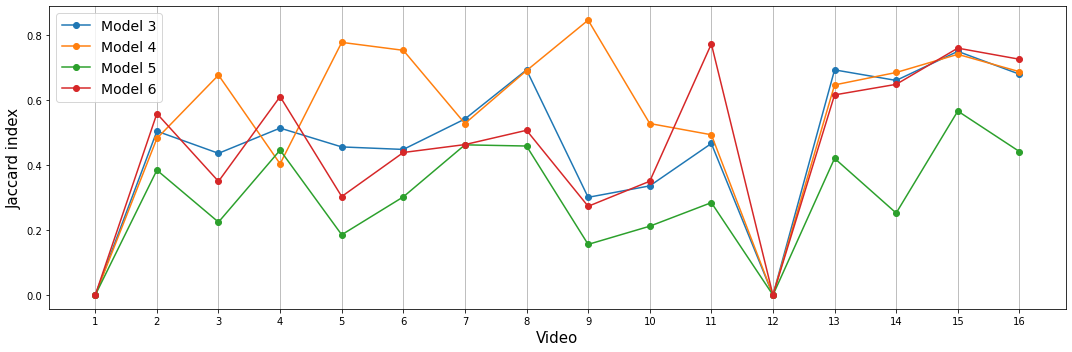

In [ ]:
# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'
vid2con = path2data + 'cons.csv'
vid2red = path2data + 'video_accuracies_1500.csv'
vid2mod5 = path2data + 'video_accuracies_2980.csv'
vid2mod6 = path2data + 'video_accuracies_3000.csv'

vid_con = pd.read_csv(vid2con,sep=';',header=0)
vid_red = pd.read_csv(vid2red, sep=';', header=0)
vid_mod5 = pd.read_csv(vid2mod5, sep=';', header=0)
vid_mod6 = pd.read_csv(vid2mod6, sep=';', header=0)
vid_order = pd.read_csv(path2cell + 'videos_name.csv', sep=';', header=0)
fig, ax = plt.subplots(figsize=(15,5))


df1 = pd.DataFrame(vid_order[['Video', 'Name']])
df1['Model $3$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_con['video'])):
        if df1['Video'][i]==vid_con['video'][j]:
            df1['Model $3$'][i]=vid_con[' Jaccard index'][j]

df1['Model $4$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_red['video'])):
        if df1['Video'][i]==vid_red['video'][j]:
            df1['Model $4$'][i]=vid_red[' Jaccard index'][j]

df1['Model $5$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_mod5['video'])):
        if df1['Video'][i]==vid_mod5['video'][j]:
            df1['Model $5$'][i]=vid_mod5[' Jaccard index'][j]

df1['Model $6$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_mod6['video'])):
        if df1['Video'][i]==vid_mod6['video'][j]:
            df1['Model $6$'][i]=vid_mod6[' Jaccard index'][j]           


df1['Num']='0'
labels=np.zeros(16)
for i in range(len(df1['Name'])):
  df1['Num'][i]=i+1
  labels[i]=i+1

ax.plot(df1['Num'], df1['Model $3$'],'o-', label='Model 3')
ax.plot(df1['Num'], df1['Model $4$'],'o-', label='Model 4')
ax.plot(df1['Num'], df1['Model $5$'],'o-', label='Model 5')
ax.plot(df1['Num'], df1['Model $6$'],'o-', label='Model 6')

ax.set_xlabel('Video',fontsize=15)
ax.set_ylabel('Jaccard index', fontsize=15)
ax.grid(axis='x')
ax.set_xticks(labels)

ax.legend(prop={'size': 14})
fig.tight_layout()


fig.savefig(path2data + 'jac_final_total.pdf', dpi=300, transparent= True)

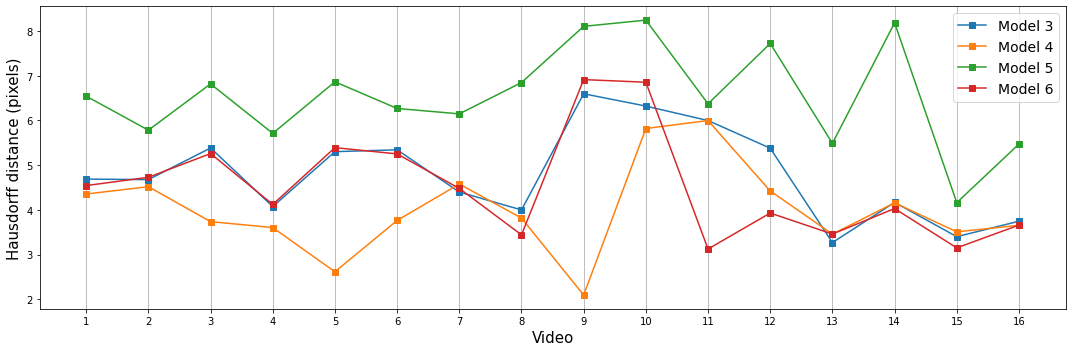

In [ ]:
# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'
# vid2con = path2data + 'sampling_constant_v00/video_accuracies_1500.csv'
# vid2red = path2data + 'sampling_reduce_v00/video_accuracies_1500.csv'
# vid2mod5 = path2data + 'constante_tiramisu/2980/video_accuracies_2980.csv'
# vid2mod6 = path2data + 'reduce_tiramisu/3000/video_accuracies_3000.csv'

# path2data='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/'
# path2cell = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/Results_CellSegmentation/'
vid2con = path2data + 'cons.csv'
vid2red = path2data + 'video_accuracies_1500.csv'
vid2mod5 = path2data + 'video_accuracies_2980.csv'
vid2mod6 = path2data + 'video_accuracies_3000.csv'

vid_con = pd.read_csv(vid2con,sep=';',header=0)
vid_red = pd.read_csv(vid2red, sep=';', header=0)
vid_mod5 = pd.read_csv(vid2mod5, sep=';', header=0)
vid_mod6 = pd.read_csv(vid2mod6, sep=';', header=0)
vid_order = pd.read_csv(path2cell + 'videos_name.csv', sep=';', header=0)
fig, ax = plt.subplots(figsize=(15,5))


df1 = pd.DataFrame(vid_order[['Video', 'Name']])
df1['Model $3$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_con['video'])):
        if df1['Video'][i]==vid_con['video'][j]:
            df1['Model $3$'][i]=vid_con[' Hausdorff-distance'][j]

df1['Model $4$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_red['video'])):
        if df1['Video'][i]==vid_red['video'][j]:
            df1['Model $4$'][i]=vid_red[' Hausdorff-distance'][j]

df1['Model $5$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_mod5['video'])):
        if df1['Video'][i]==vid_mod5['video'][j]:
            df1['Model $5$'][i]=vid_mod5[' Hausdorff-distance'][j]

df1['Model $6$']='0'
for i in range(len(df1['Video'])):
    for j in range(len(vid_mod6['video'])):
        if df1['Video'][i]==vid_mod6['video'][j]:
            df1['Model $6$'][i]=vid_mod6[' Hausdorff-distance'][j]  


df1['Num']='0'
labels=np.zeros(16)
for i in range(len(df1['Name'])):
  df1['Num'][i]=i+1
  labels[i]=i+1

ax.plot(df1['Num'], df1['Model $3$'],'s-', label='Model 3')
ax.plot(df1['Num'], df1['Model $4$'],'s-', label='Model 4')
ax.plot(df1['Num'], df1['Model $5$'],'s-', label='Model 5')
ax.plot(df1['Num'], df1['Model $6$'],'s-', label='Model 6')

ax.set_xlabel('Video',fontsize=15)
ax.set_ylabel('Hausdorff distance (pixels)', fontsize=15)
ax.grid(axis='x')
ax.set_xticks(labels)

ax.legend(prop={'size': 14})
fig.tight_layout()
fig.savefig(path2data + 'Haus_total.pdf', dpi=300, transparent= True)

Average loss

Accuracy per epoch in cells

Model3
0.8455170179514189
Model4
0.8421649442527284
Model5 (1)
0.6265834193525951
Model6 (1)
0.7920153349757814


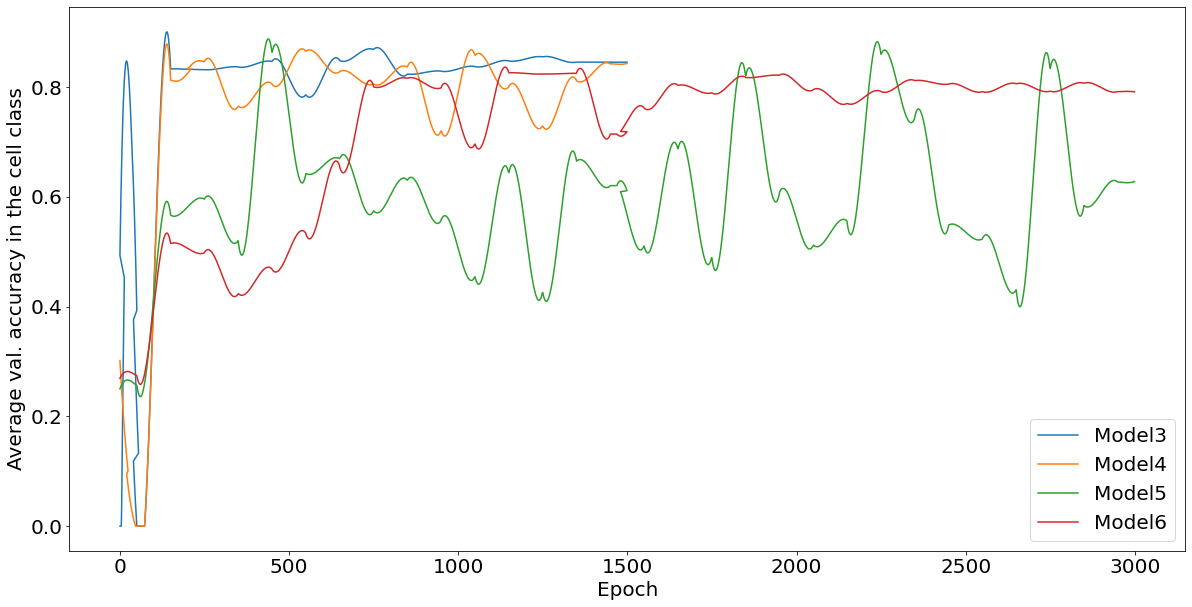

In [ ]:
path2results='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/RESULTS-SERVER/results/'


fig, ax = plt.subplots(figsize=(20,10))
width = 0.2
epochselect=np.zeros(4)
os.chdir(path2results)
# for file in glob.glob("*.csv"):
#       name=os.path.splitext(file)[0]
model = ['Model3', 'Model4', 'Model5 (1)', 'Model6 (1)']
models = ['Model3', 'Model4', 'Model5', 'Model6']

for i in range(len(model)):
      vid= pd.read_csv(path2results + model[i] +'.csv', sep=';',header=0)
      y=vid[' Cell'].values
      x=vid['Epoch'].values
      yhat = savgol_filter(y, 101, 3) # window size 51, polynomial order 3
      print(model[i])
      print(y[-1])
      yhat[yhat<0]=0
      ax.plot(x,yhat,label=models[i])

ax.set_xlabel('Epoch',fontsize=20)
ax.set_ylabel('Average val. accuracy in the cell class',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_title('Average validation accuracy of cell class vs epoch',fontsize=30)
ax.legend(prop={'size': 20})
# sns.lineplot(x=vid_con['Epoch'], y=[vid_con [' Cell'], vid_red [' Cell'],vid_mod5 [' Cell'],vid_mod6 [' Cell']])
fig.savefig(path2results + 'Cell_accuracy_mod.pdf', dpi=300, transparent= True)

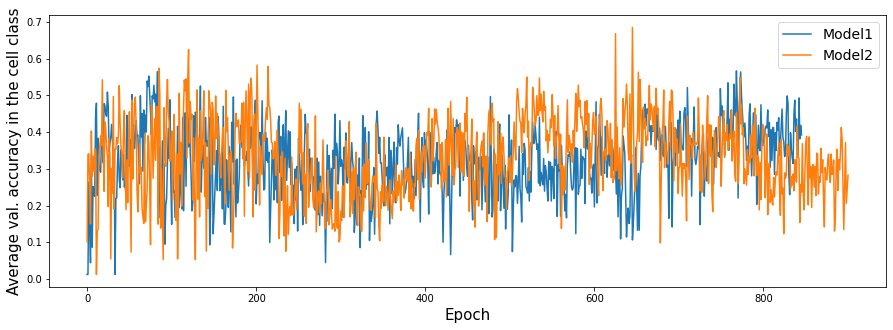

In [ ]:
# path2results='/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/RESULTS-SERVER/results/'


fig, ax = plt.subplots(figsize=(15,5))
model = ['Model1', 'Model2']

for i in range(len(model)):
      vid= pd.read_csv(path2results + model[i] +'.csv', sep=';',header=0)
      y=vid[' Cell'].values
      x=vid['Epoch'].values
      ax.plot(x,y,label=model[i])

ax.set_xlabel('Epoch',fontsize=15)
ax.set_ylabel('Average val. accuracy in the cell class',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(prop={'size': 14})
fig.savefig(path2results + 'Cell_accuracy_mod_12.pdf', dpi=300, transparent= True)